In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)
#importing necessary libraries

In [2]:
df=pd.read_csv('rideshare_kaggle.csv')
#importing dataset

In [3]:
df.head()
#head of the data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df=df.drop(['id','source','latitude','longitude','short_summary','windSpeed','precipIntensity','windGust','visibility','dewPoint','pressure','windBearing','uvIndex','moonPhase','cloudCover','ozone'],axis=1)

In [5]:
df.isna().sum()
#check for missing values
#55,095 missing price values

timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
temperature                        0
apparentTemperature                0
long_summary                       0
precipProbability                  0
humidity                           0
windGustTime                       0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
temperatureLowTime                 0
apparentTemperatureHigh            0
apparentTemperatureHighTime        0
apparentTemperatureLow             0
apparentTemperatureLowTime         0
i

In [6]:
df = df.dropna()
#drop missing values

In [7]:
df=df.drop(['timestamp','datetime','windGustTime','temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime',
           'apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime',
            'sunriseTime','sunsetTime','precipIntensityMax','uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax',
            'temperatureMaxTime','apparentTemperature','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax'
           ,'apparentTemperatureMaxTime','long_summary','icon','product_id','timezone','visibility.1','destination'],axis=1)
#drops unessecary variables

In [8]:
df.head()
#head of dataset without dropped variables

,hour,day,month,cab_type,name,price,distance,surge_multiplier,temperature,precipProbability,humidity
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.34,0.0,0.68
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,43.58,1.0,0.94
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,38.33,0.0,0.75
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,0.0,0.73
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,37.44,0.0,0.70


In [9]:
df_dummies = pd.get_dummies(df, prefix='', prefix_sep='', 
                            columns=['cab_type', 'name'])
df_dummies.head()

,hour,day,month,price,distance,surge_multiplier,temperature,precipProbability,humidity,Lyft,...,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,9,16,12,5.0,0.44,1.0,42.34,0.0,0.68,1,...,0,0,0,0,0,1,0,0,0,0
1,2,27,11,11.0,0.44,1.0,43.58,1.0,0.94,1,...,1,0,0,0,0,0,0,0,0,0
2,1,28,11,7.0,0.44,1.0,38.33,0.0,0.75,1,...,0,0,0,1,0,0,0,0,0,0
3,4,30,11,26.0,0.44,1.0,34.38,0.0,0.73,1,...,0,0,1,0,0,0,0,0,0,0
4,3,29,11,9.0,0.44,1.0,37.44,0.0,0.70,1,...,0,0,0,0,1,0,0,0,0,0


In [10]:
def min_max_scaling(df_dummies):
    # copy the dataframe
    df_norm = df_dummies.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_dummies_normalized = min_max_scaling(df_dummies)

df_dummies_normalized

,hour,day,month,price,distance,surge_multiplier,temperature,precipProbability,humidity,Lyft,...,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.391304,0.517241,1.0,0.026316,0.053571,0.0,0.611590,0.0,0.517241,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.086957,0.896552,0.0,0.089474,0.053571,0.0,0.643957,1.0,0.965517,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.043478,0.931034,0.0,0.047368,0.053571,0.0,0.506917,0.0,0.637931,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.173913,1.000000,0.0,0.247368,0.053571,0.0,0.403811,0.0,0.603448,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.130435,0.965517,0.0,0.068421,0.053571,0.0,0.483686,0.0,0.551724,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.000000,0.000000,1.0,0.073684,0.125000,0.0,0.473506,0.0,0.620690,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
693066,1.000000,0.000000,1.0,0.110526,0.125000,0.0,0.473506,0.0,0.620690,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
693067,1.000000,0.000000,1.0,0.073684,0.125000,0.0,0.473506,0.0,0.620690,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693069,1.000000,0.000000,1.0,0.257895,0.125000,0.0,0.473506,0.0,0.620690,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dfL = df_dummies_normalized[df['cab_type'] == 'Lyft']
dfL

,hour,day,month,price,distance,surge_multiplier,temperature,precipProbability,humidity,Lyft,...,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.391304,0.517241,1.0,0.026316,0.053571,0.0,0.611590,0.0,0.517241,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.086957,0.896552,0.0,0.089474,0.053571,0.0,0.643957,1.0,0.965517,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.043478,0.931034,0.0,0.047368,0.053571,0.0,0.506917,0.0,0.637931,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.173913,1.000000,0.0,0.247368,0.053571,0.0,0.403811,0.0,0.603448,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.130435,0.965517,0.0,0.068421,0.053571,0.0,0.483686,0.0,0.551724,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693042,0.043478,0.965517,0.0,0.147368,0.394133,0.0,0.509267,0.0,0.586207,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
693043,0.043478,0.965517,0.0,0.210526,0.394133,0.0,0.509267,0.0,0.586207,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
693048,0.043478,0.965517,0.0,0.047368,0.394133,0.0,0.509267,0.0,0.586207,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
693051,0.043478,0.965517,0.0,0.084211,0.394133,0.0,0.509267,0.0,0.586207,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
x=dfL.drop(['price'],axis=1)
y=dfL['price'].values

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=ml.predict(x_test)
print(y_pred)

[0.175 0.283 0.015 ... 0.161 0.188 0.152]


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9364643748462472

Text(0.5, 1.0, 'Actual vs. Predicted')

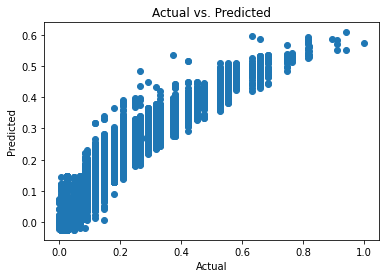

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [25]:
dfU = df_dummies_normalized[df['cab_type'] == 'Uber']
dfU

,hour,day,month,price,distance,surge_multiplier,temperature,precipProbability,humidity,Lyft,...,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
12,0.956522,1.000000,0.0,0.100000,0.139031,0.0,0.553902,0.00,0.379310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,0.434783,0.413793,1.0,0.142105,0.139031,0.0,0.038371,0.00,0.482759,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.826087,0.413793,1.0,0.052632,0.139031,0.0,0.363874,0.00,0.310345,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,1.000000,0.517241,1.0,0.052632,0.139031,0.0,0.584182,0.94,0.827586,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,0.000000,0.448276,1.0,0.247368,0.139031,0.0,0.322109,0.00,0.448276,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.000000,0.000000,1.0,0.073684,0.125000,0.0,0.473506,0.00,0.620690,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
693066,1.000000,0.000000,1.0,0.110526,0.125000,0.0,0.473506,0.00,0.620690,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
693067,1.000000,0.000000,1.0,0.073684,0.125000,0.0,0.473506,0.00,0.620690,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693069,1.000000,0.000000,1.0,0.257895,0.125000,0.0,0.473506,0.00,0.620690,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
x=dfU.drop(['price'],axis=1)
y=dfU['price'].values

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=ml.predict(x_test)
print(y_pred)

[0.101 0.099 0.053 ... 0.08  0.166 0.098]


In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9203170271508834

Text(0.5, 1.0, 'Actual vs. Predicted')

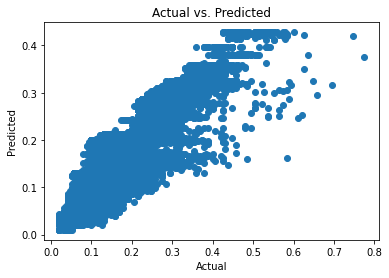

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')